In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
corners_list = []
tile_center = ()
#new =[]
angle_margin =30
corner_left_top_candidates=[]
corner_left_bottom_candidates=[]
angle_candidates_left_top =[]
angle_candidates_left_bottom =[]
#print(corners)
margin =30
corner_right_top_candidates=[]
corner_right_bottom_candidates=[]
angle_candidates_right_top =[]
angle_candidates_right_bottom =[]
left_top_corner_point = []
right_top_corner_point = []
right_bottom_corner_point=[] 
left_bottom_corner_point=[]
top_list =[]
contours = []
left_list =[]
right_list =[]  
bottom_list =[]

In [3]:
def read_image():
    global img
    image = cv2.imread("Puzzle_bw.jpg", cv2.IMREAD_COLOR)
    crop_img = image[500:2800, 1500:3500]
    #plt.imshow(crop_img)
    img =cv2.resize(crop_img  , (512, 256))
    plt.imshow(img)
    return img

In [4]:
def threshold_image(img):
    gray = cv2.cvtColor(img , cv2.COLOR_RGB2GRAY)
    blurred_frame = cv2.GaussianBlur(gray, (5, 5), 0)
    ret,thresh = cv2.threshold(blurred_frame,127,255,cv2.THRESH_BINARY)
    plt.imshow(thresh)
    return thresh

In [5]:
def corner_detection(thresh):
    global corners_list , img
    corners = cv2.goodFeaturesToTrack(thresh,100,0.01,5)
    corners = np.int0(corners)
    #print(corners)
    corners_list=[]
    img_with_corners = img.copy()
    #print(corners.ravel())
    for i in corners:
        x,y = i.ravel()
        corners_list.append([x,y])
        img_with_corners = cv2.circle(img_with_corners,(x,y),3,255,-1)
    plt.imshow(img_with_corners),plt.show()
    cv2.namedWindow('corners', cv2.WINDOW_NORMAL)
    cv2.imshow('corners', img_with_corners)
    plt.imshow(img_with_corners)
    key = cv2.waitKey(10000)
    cv2.destroyAllWindows()
    print(corners_list)
    print(len(corners_list))
    return corners_list , corners

In [6]:
def rectangular_box(corners):
    global tile_center , img
    rect = cv2.minAreaRect(corners)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    img_with_box = img.copy()
    img_with_box = cv2.drawContours(img_with_box,[box],0,(0,0,255),2)
    print(box)
    cv2.namedWindow("img_with_box" , cv2.WINDOW_NORMAL)
    cv2.imshow("img_with_box", img_with_box)
    key = cv2.waitKey(10000)
    cv2.destroyAllWindows()
    plt.imshow(img_with_box)
    #Finding the center point of the rectangle
    center_x =int((box[1][0] + box[3][0])/2)
    center_y =int((box[1][1] + box[3][1])/2)
    print(center_x)
    print(center_y)
    img_center = cv2.circle(img_with_box, (center_x, center_y) , 3, (255,255,255),1)
    plt.imshow(img_center)
    tile_center= (center_x , center_y)
    tile_center = tuple(np.round(tile_center).astype(np.int))
    print(tile_center)
    return tile_center

In [7]:
def contour_plot(thresh):
    global img
    global contours
    _, contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    img_with_contours= img.copy()
    for contour in contours:
        area = cv2.contourArea(contour)
        print(area)
        if   (area  < 80000):
            #contour_final.append(contour)
            cv2.drawContours(img_with_contours, contour, -1, (255, 0, 0), 3)
    #print(contours)
    #cv2.circle(img_with_contours, (tile_center1[1] , tile_center1[0]), 5 , (255,0,0), 3)
    plt.imshow(img_with_contours)
    cv2.namedWindow("img_with_contours" , cv2.WINDOW_NORMAL)
    cv2.imshow("img_with_contours", img_with_contours)
    key = cv2.waitKey(10000)
    cv2.destroyAllWindows()
    return contours

In [8]:
def get_vector(p1, p2):
    if type(p1).__module__ != np.__name__:
        p1 = np.array(p1)
    if type(p2).__module__ != np.__name__:
        p2 = np.array(p2)
    return p2 - p1

In [9]:
def get_angle(p1,p2,p3):
    """calculate angle between p2_p3 and p2_p3"""
    p2p1 = get_vector(p2,p1)
    p2p3 = get_vector(p2,p3)
    cosine_angle = np.dot(p2p1, p2p3) / (np.linalg.norm(p2p1) * np.linalg.norm(p2p3))
    angle = np.arccos(cosine_angle)
    np.seterr(divide='ignore', invalid='ignore')
    #print(np.degrees(angle))
    return np.degrees(angle)

In [10]:
def sort_points(xylist):
    x, y = zip(*xylist)
    #print(x)
    #print(y)
    l = len(x)
    (cx , cy) = tile_center
    xy_sorted = sorted(xylist, key = lambda x: math.atan2((x[1]-cy),(x[0]-cx)))
    return xy_sorted 

In [11]:
def corners_new_left(corners_list , tile_center ):
    #new =[]
    global angle_margin
    #global corners
    #global corners_list
    global corner_left_top_candidates
    global corner_left_bottom_candidates
    global angle_candidates_left_top
    global angle_candidates_left_bottom 
    #print(corners)
    global margin
    corners=corners_list
    for c1 in corners:
        #print(c1) 
        if c1[0] <= tile_center[0] and c1[1] <= tile_center[1]:
            corner_left_top_candidates.append(c1)
    #print(corner_left_top_candidates)
    corner_left_top_candidates_sorted = sort_points(corner_left_top_candidates)
    #print(corner_left_top_candidates_sorted)
    for i in range(len(corner_left_top_candidates_sorted)-2):
        a = get_angle(corner_left_top_candidates_sorted[i],corner_left_top_candidates_sorted[i+1],corner_left_top_candidates_sorted[i+2])
        #del corner_left_top_candidates_sorted[0]
        if 90 - margin < a < 90 + margin:
            angle_candidates_left_top.append(corner_left_top_candidates_sorted[i+1])
    
    
    for c1 in corners:
        #print(c1) 
        if c1[0] <= tile_center[0] and c1[1] >= tile_center[1]:
            corner_left_bottom_candidates.append(c1)
   # print(corner_left_bottom_candidates)
    corner_left_bottom_candidates_sorted = sort_points(corner_left_bottom_candidates)
    #print(corner_left_bottom_candidates_sorted)
    for i in range(len(corner_left_bottom_candidates_sorted)-2):
        a = get_angle(corner_left_bottom_candidates_sorted[i],corner_left_bottom_candidates_sorted[i+1],corner_left_bottom_candidates_sorted[i+2])
        #del corner_left_top_candidates_sorted[0]
        if 90 - margin < a < 90 + margin:
            angle_candidates_left_bottom.append(corner_left_bottom_candidates_sorted[i+1])
            
    #print(angle_candidates)
    #corner_left_top_candidates_combination = list(combinations_with_replacement(corner_left_top_candidates, 2)) 
    #print(corner_left_top_candidates_combination)
    
    
    return angle_candidates_left_top ,angle_candidates_left_bottom

In [12]:
def corners_new_right(corners_list ,tile_center):
    #new =[]
    global angle_margin
    #global corners
    #global corners_list
    global corner_right_top_candidates
    global corner_right_bottom_candidates
    global angle_candidates_right_top
    global angle_candidates_right_bottom 
    #print(corners)
    corners=corners_list
    global margin
    for c1 in corners:
        #print(c1) 
        if c1[0] >= tile_center[0] and c1[1] <= tile_center[1]:
            corner_right_top_candidates.append(c1)
    #print(corner_right_top_candidates)
    #corner_right_top_candidates_sorted = sorted(corner_right_top_candidates, key=lambda x: x[0])
    corner_right_top_candidates_sorted = sort_points(corner_right_top_candidates)
    #print(corner_right_top_candidates_sorted)
    for i in range(len(corner_right_top_candidates_sorted)-2):
        a = get_angle(corner_right_top_candidates_sorted[i],corner_right_top_candidates_sorted[i+1],corner_right_top_candidates_sorted[i+2])
        #del corner_left_top_candidates_sorted[0]
        if 90 - margin < a < 90 + margin :
            angle_candidates_right_top.append(corner_right_top_candidates_sorted[i+1])
    
    
    for c1 in corners:
        #print(c1) 
        if c1[0] >= tile_center[0] and c1[1] >= tile_center[1]:
            corner_right_bottom_candidates.append(c1)
    #print(corner_right_bottom_candidates)
    corner_right_bottom_candidates_sorted = sort_points(corner_right_bottom_candidates)
    #print(corner_right_bottom_candidates_sorted)
    for i in range(len(corner_right_bottom_candidates_sorted)-2):
        a = get_angle(corner_right_bottom_candidates_sorted[i],corner_right_bottom_candidates_sorted[i+1],corner_right_bottom_candidates_sorted[i+2])
        #del corner_left_top_candidates_sorted[0]
        if 90 - margin < a < 90 + margin:
            angle_candidates_right_bottom.append(corner_right_bottom_candidates_sorted[i+1])
            
    #print(angle_candidates)
    #corner_left_top_candidates_combination = list(combinations_with_replacement(corner_left_top_candidates, 2)) 
    #print(corner_left_top_candidates_combination)
    
    
    return angle_candidates_right_top ,angle_candidates_right_bottom

In [13]:
def plot_corner_candidates_left( angle_candidates_left_top , angle_candidates_left_bottom):
    global img
    for i in angle_candidates_left_top:
        img_candidates_left = cv2.circle(img, tuple(i), 3 , (0,255,0), 1)
    for i in angle_candidates_left_bottom:
        img_candidates_left = cv2.circle(img, tuple(i), 3 , (0,255,0), 1)
    cv2.circle(img_candidates_left, (tile_center[0] , tile_center[1]), 5 , (255,0,0), 3)   
    plt.imshow(img_candidates_left)

In [14]:
def plot_corner_candidates_right(angle_candidates_right_top ,angle_candidates_right_bottom):    
    global img
    for i in angle_candidates_right_top:
        img_candidates_right = cv2.circle(img, tuple(i), 3 , (0,0,255), 1)
    for i in angle_candidates_right_bottom:
        img_candidates_right = cv2.circle(img, tuple(i), 3 , (0,0,255), 1)
    #cv2.circle(img_candidates_right, (tile_center[0] , tile_center[1]), 5 , (255,0,0), 3)   
    plt.imshow(img_candidates_right)

In [15]:
def left_top_corner(angle_candidates_left_top):
    global left_top_corner_point
    h =[]
    w=[]
    left_top_corner_point=[]
    print(angle_candidates_left_top)
    for i in range(len(angle_candidates_left_top)):
        h.append(angle_candidates_left_top[i][0])
    print(h)
    d1 = h.index(min(h))
    print(min(h))
    for i in range(0, len(angle_candidates_left_top)):
        w.append(angle_candidates_left_top[i][1])
    d2 = w.index(min(w)) 
    left_top_corner_point.append(angle_candidates_left_top[d1])
    print(left_top_corner_point)
    print(angle_candidates_left_top[d2][1])
    if left_top_corner_point[0][1] > 70:
        del angle_candidates_left_top[d1]
        left_top_corner(angle_candidates_left_top)
    print(left_top_corner_point)
    return left_top_corner_point

In [16]:
def left_bottom_corner(angle_candidates_left_bottom):
    global left_bottom_corner_point
    h =[]
    w=[]
    left_bottom_corner_point=[]
    print(angle_candidates_left_bottom)
    for i in range(0, len(angle_candidates_left_bottom)):
        h.append(angle_candidates_left_bottom[i][1])
    d1 = h.index(max(h))
    print(h)
    #print(d1)
    left_bottom_corner_point.append(angle_candidates_left_bottom[d1])
    #print(angle_candidates_left_bottom[d1])
    #print(left_top_corner_point[0][0] - 20)
    #print(left_top_corner_point[0][0] + 20)
    if (left_top_corner_point[0][0] - 20) <= left_bottom_corner_point[0][0] <= (left_top_corner_point[0][0] + 20):
        return left_bottom_corner_point
    else:
        del angle_candidates_left_bottom[d1]
        left_bottom_corner(angle_candidates_left_bottom)
    print(left_bottom_corner_point)
    
    return left_bottom_corner_point

In [17]:
def right_top_corner(angle_candidates_right_top):
    global right_top_corner_point
    h =[]
    w=[]
    right_top_corner_point=[]
    print(angle_candidates_right_top)
    for i in range(0, len(angle_candidates_right_top)):
        h.append(angle_candidates_right_top[i][0])
    d1 = h.index(max(h))
    print(h)
    for i in range(0, len(angle_candidates_right_top)):
        w.append(angle_candidates_right_top[i][1])
    d2 = w.index(min(w))
    right_top_corner_point.append(angle_candidates_right_top[d1])
    print(angle_candidates_right_top[d1])
    print(right_top_corner_point[0][1])
    if right_top_corner_point[0][1] >= 75:
        del angle_candidates_right_top[d1]
        right_top_corner(angle_candidates_right_top)
    else:
        return right_top_corner_point

In [18]:
def right_bottom_corner(angle_candidates_right_bottom):
    global right_bottom_corner_point
    h =[]
    w=[]
    right_bottom_corner_point=[]
    print(angle_candidates_right_bottom)
    for i in range(0, len(angle_candidates_right_bottom)):
        print(i)
        h.append(angle_candidates_right_bottom[i][1])
        #print(h)
    print(h)
    d1 = h.index(max(h))
    
    #print(d1)
    right_bottom_corner_point.append(angle_candidates_right_bottom[d1])
    print(angle_candidates_right_bottom[d1])
    if (right_top_corner_point[0][0] - 20) <= right_bottom_corner_point[0][0] <= (right_top_corner_point[0][0] + 20):
        return right_bottom_corner_point
    else:
        del angle_candidates_right_bottom[d1]
        right_bottom_corner(angle_candidates_right_bottom)
    print(right_bottom_corner_point)
    
    return left_bottom_corner_point

In [19]:
def plot_corner_points():
    global img, angle_candidates_left_bottom , angle_candidates_left_top
    global angle_candidates_right_top , angle_candidates_right_bottom
    global left_top_corner_point, left_bottom_corner_point
    global right_top_corner_point , right_bottom_corner_point
    plot_corner_points = img.copy()
    plot_corner_points =cv2.circle(plot_corner_points, (left_top_corner_point[0][0], left_top_corner_point[0][1]), 1, (0,255,255),2) 
    plot_corner_points =cv2.circle(plot_corner_points, (left_bottom_corner_point[0][0], left_bottom_corner_point[0][1]), 1, (0,255,255),2) 
    plot_corner_points =cv2.circle(plot_corner_points, (right_top_corner_point[0][0], right_top_corner_point[0][1]), 1, (0,255,255),2) 
    plot_corner_points =cv2.circle(plot_corner_points, (right_bottom_corner_point[0][0], right_bottom_corner_point[0][1]), 1, (0,255,255),2) 
    plt.imshow(plot_corner_points)

In [20]:
def puzzle_shape_left():
    global corners_list , left_top_corner_point
    global left_bottom_corner_point , tile_center
    corners = corners_list
    left_shape_male = []
    left_shape_female = []
    for c in corners:
        if c[0] < tile_center[0] \
        and ((left_top_corner_point[0][1] +10) <= c[1] <= (left_bottom_corner_point[0][1] - 10)):
            if (left_top_corner_point[0][0] - 50) <c[0] < (left_top_corner_point[0][0]):
            #if (c[0] <= max(left_top_corner_point[0][0],left_bottom_corner_point[0][0])):
                left_shape_male.append(c)
            elif (left_top_corner_point[0][0] ) < c[0] < (left_top_corner_point[0][0] +50):
                left_shape_female.append(c)
    if len(left_shape_male) > len(left_shape_female):
        #print('left side is male shape')
        puzzle_side_shape = 'male'     
    elif len(left_shape_male) < len(left_shape_female) :
        #print('left side is female shape')
        puzzle_side_shape = 'female'     
    else:
        #print('left side is straight')
        puzzle_side_shape = 'straight'
    
    return puzzle_side_shape

In [21]:
def puzzle_shape_right():
    global right_top_corner_point , right_bottom_corner_point
    global corners_list , tile_center
    corners = corners_list
    right_shape_male = []
    right_shape_female = []
    for c in corners:
        if c[0] > tile_center[0] \
        and ((right_top_corner_point[0][1] +10) <= c[1] <= (right_bottom_corner_point[0][1] - 10)):
            if (right_top_corner_point[0][0] - 50) <c[0] < (right_top_corner_point[0][0]):
            #if (c[0] <= max(left_top_corner_point[0][0],left_bottom_corner_point[0][0])):
                right_shape_female.append(c)
            elif (right_top_corner_point[0][0] ) < c[0] < (right_top_corner_point[0][0] +50):
                right_shape_male.append(c)
    if len(right_shape_male) > len(right_shape_female):
        puzzle_side_shape = 'male'
        #print('right side is male shape')
    elif len(right_shape_male) < len(right_shape_female):
        puzzle_side_shape = 'female'
        #print('right side is female shape')
    else:
        puzzle_side_shape = 'straight'
        #print('right side is straight')
    return puzzle_side_shape

In [22]:
def puzzle_shape_top():
    global corners_list, tile_center
    global left_top_corner_point , right_top_corner_point
    top_shape_male = []
    top_shape_female = []
    corners = corners_list
    for c in corners:
        if ((left_top_corner_point[0][0]) <= c[0] <= (right_top_corner_point[0][0])):
            if (left_top_corner_point[0][1] - 50) <c[1] < (left_top_corner_point[0][1]):
            #if (c[0] <= max(left_top_corner_point[0][0],left_bottom_corner_point[0][0])):
                top_shape_male.append(c)
            elif (left_top_corner_point[0][1] ) < c[1] < (left_top_corner_point[0][1] +50):
                top_shape_female.append(c)
        if len(top_shape_male) > len(top_shape_female):
            #print('left side is male shape')
            puzzle_side_shape = 'male'     
        elif len(top_shape_male) < len(top_shape_female) :
            #print('left side is female shape')
            puzzle_side_shape = 'female'     
        else:
            #print('left side is straight')
            puzzle_side_shape = 'straight'
    return puzzle_side_shape

In [23]:
def puzzle_shape_bottom():
    global corners_list, tile_center
    global left_bottom_corner_point , right_bottom_corner_point
    bottom_shape_male = []
    bottom_shape_female = []
    corners = corners_list
    for c in corners:
        if ((left_bottom_corner_point[0][0]) <= c[0] <= (right_bottom_corner_point[0][0])):
            if (left_bottom_corner_point[0][1] - 50) <c[1] < (left_bottom_corner_point[0][1]):
            #if (c[0] <= max(left_top_corner_point[0][0],left_bottom_corner_point[0][0])):
                bottom_shape_female.append(c)
            elif (left_bottom_corner_point[0][1] ) < c[1] < (left_bottom_corner_point[0][1] +50):
                bottom_shape_male.append(c)
        if len(bottom_shape_male) > len(bottom_shape_female):
            #print('left side is male shape')
            puzzle_side_shape = 'male'     
        elif len(bottom_shape_male) < len(bottom_shape_female) :
            #print('left side is female shape')
            puzzle_side_shape = 'female'     
        else:
            #print('left side is straight')
            puzzle_side_shape = 'straight'
    return puzzle_side_shape

In [24]:
def side_bottom():
    global bottom_list, img  , contours
    contour_list_bottom=[]
    img_bottom = img.copy()
    for c in contours:
        area = cv2.contourArea(c)
        if   (area  < 80000):
            for i in c:
                x,y = i.ravel()
                contour_list_bottom.append([x,y])
            #print(contour_list_top)
            for c in contour_list_bottom:
                puzzle_side_shape = puzzle_shape_bottom()
                #print(puzzle_side_shape)
                if puzzle_side_shape == 'male':
                    if (c[1] >= (min(left_bottom_corner_point[0][1],right_bottom_corner_point[0][1]))  and (left_bottom_corner_point[0][0] <= c[0] <= right_bottom_corner_point[0][0])):
                        cv2.circle(img_bottom, tuple(c), 3 , (255,0,0), 1)
                        bottom_list.append(c)
                if puzzle_side_shape == 'female':
                    if ((c[1] >= ( min(left_bottom_corner_point[0][1],right_bottom_corner_point[0][1]) - 60)) and (left_bottom_corner_point[0][0] <= c[0] <= right_bottom_corner_point[0][0])):
                        cv2.circle(img_bottom, tuple(c), 3 , (255,0,0), 1)
                        bottom_list.append(c)
    plt.imshow(img_bottom)
    print("bottom list: " , bottom_list)
    
    cv2.namedWindow("bottom_side" , cv2.WINDOW_NORMAL)
    cv2.imshow("bottom_side", img_bottom)
    key = cv2.waitKey(10000)
    cv2.destroyAllWindows()
    return bottom_list , img_bottom

In [25]:
def side_top():
    global top_list, img  , contours
    contour_list_top=[]
    img_top= img.copy()
    for c in contours:
        area = cv2.contourArea(c)
        if   (area  < 80000):
            for i in c:
                x,y = i.ravel()
                contour_list_top.append([x,y])
            #print(contour_list_top)
            for c in contour_list_top:
                puzzle_side_shape = puzzle_shape_top()
                #print(puzzle_side_shape)
                if puzzle_side_shape == 'male':
                    if (c[1] <= min(left_top_corner_point[0][1],right_top_corner_point[0][1])  and (left_top_corner_point[0][0] <= c[0] <= right_top_corner_point[0][0])):
                        cv2.circle(img_top, tuple(c), 3 , (255,0,0), 1)
                        top_list.append(c)
                if puzzle_side_shape == 'female':
                    if ((c[1] <= ( min(left_top_corner_point[0][1],right_top_corner_point[0][1]) + 50)) and (left_top_corner_point[0][0] <= c[0] <= right_top_corner_point[0][0])):
                        cv2.circle(img_top, tuple(c), 3 , (255,0,0), 1)
                        top_list.append(c)
    plt.imshow(img_top)
    print("top list: " , top_list)
    
    cv2.namedWindow("top_side" , cv2.WINDOW_NORMAL)
    cv2.imshow("top_side", img_top)
    key = cv2.waitKey(10000)
    cv2.destroyAllWindows()
    return top_list , img_top

In [26]:
def side_left():
    global top_list  , contours , img
    contour_list_left=[]

    img_left= img.copy()
    for c in contours:
        area = cv2.contourArea(c)
        if   (area  < 80000):
            for i in c:
                x,y = i.ravel()
                contour_list_left.append([x,y])
            #print(contour_list)
            for c in contour_list_left:
                puzzle_side_shape = puzzle_shape_left()
                #print(puzzle_side_shape)
                if puzzle_side_shape == 'male':
                    if (c[0] <= max(left_top_corner_point[0][0],left_bottom_corner_point[0][0])  and (left_top_corner_point[0][1] <= c[1] <= left_bottom_corner_point[0][1])):
                        cv2.circle(img_left, tuple(c), 3 , (255,0,0), 1)
                        left_list.append(c)
                if puzzle_side_shape == 'female':
                    if (c[0] <= (left_top_corner_point[0][0] + 30) and (left_top_corner_point[0][1] <= c[1] <= left_bottom_corner_point[0][1])):
                        cv2.circle(img_left, tuple(c), 3 , (255,0,0), 1)
                        left_list.append(c)
    plt.imshow(img_left)
    print("left list: " , left_list)
    
    cv2.namedWindow("left_side" , cv2.WINDOW_NORMAL)
    cv2.imshow("left_side", img_left)
    key = cv2.waitKey(10000)
    cv2.destroyAllWindows()
    return left_list , img_left

In [27]:
def side_right():
    global img , contours , right_list
    contour_list_right=[]
    img_right= img.copy()
    for c in contours:
        area = cv2.contourArea(c)
        
        if (area < 80000):
            for i in c:
                x,y = i.ravel()
                contour_list_right.append([x,y])
            #print(contour_list)
            for c in contour_list_right:
                puzzle_side_shape = puzzle_shape_right()
                if puzzle_side_shape == 'male':
                    if (c[0] >= min(right_top_corner_point[0][0],right_bottom_corner_point[0][0]) and (right_top_corner_point[0][1] <= c[1] <= right_bottom_corner_point[0][1])):
                        cv2.circle(img_right, tuple(c), 3 , (255,0,0), 1)
                        right_list.append(c)
                if puzzle_side_shape == 'female':
                    if (c[0] >= (max(right_top_corner_point[0][0],right_bottom_corner_point[0][0]) - 60) and (right_top_corner_point[0][1] <= c[1] <= right_bottom_corner_point[0][1])):
                        cv2.circle(img_right, tuple(c), 3 , (255,0,0), 1)
                        right_list.append(c)
    plt.imshow(img_right)
    print("right_list: " ,right_list)
    
    cv2.namedWindow("right_side" , cv2.WINDOW_NORMAL)
    cv2.imshow("right_side", img_right)
    key = cv2.waitKey(10000)
    cv2.destroyAllWindows()
    return right_list , img_right

In [28]:
def main():
    img = read_image()
    thresh = threshold_image(img)
    corners_list , corners = corner_detection(thresh)
    tile_center = rectangular_box(corners)
    print(tile_center)
    contours = contour_plot(thresh)
    angle_candidates_left_top ,angle_candidates_left_bottom = corners_new_left(corners_list, tile_center)
    print(angle_candidates_left_top , angle_candidates_left_bottom)
    angle_candidates_right_top ,angle_candidates_right_bottom = corners_new_right(corners_list, tile_center)
    print(angle_candidates_right_top ,angle_candidates_right_bottom)
    plot_corner_candidates_left(angle_candidates_left_top , angle_candidates_left_bottom)
    plot_corner_candidates_right(angle_candidates_right_top ,angle_candidates_right_bottom)
    left_top_corner_point = left_top_corner(angle_candidates_left_top)
    left_bottom_corner_point = left_bottom_corner(angle_candidates_left_bottom)
    right_top_corner_point = right_top_corner(angle_candidates_right_top)
    right_bottom_corner_point = right_bottom_corner(angle_candidates_right_bottom)
    plot_corner_points()
    left_list , img_left  = side_left()
    top_list, img_top = side_top()
    #plt.imshow(img_top)
    bottom_list , img_bottom = side_bottom()
    
    #plt.imshow(img_left)
    right_list , img_right  = side_right()
    bottom_list , img_bottom = side_bottom()

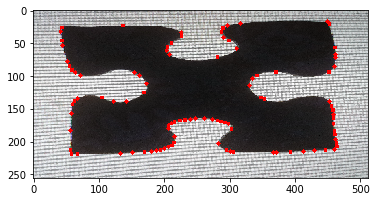

[[58, 219], [227, 39], [453, 139], [44, 26], [60, 143], [68, 134], [226, 34], [450, 17], [464, 208], [461, 189], [57, 183], [459, 173], [459, 164], [459, 159], [462, 72], [462, 67], [461, 57], [42, 32], [137, 23], [283, 203], [330, 115], [371, 94], [204, 61], [45, 54], [44, 46], [288, 33], [317, 20], [169, 125], [335, 104], [64, 95], [291, 41], [215, 201], [303, 181], [207, 180], [207, 175], [353, 135], [348, 133], [105, 133], [173, 112], [342, 99], [162, 99], [72, 99], [155, 95], [452, 94], [460, 86], [55, 85], [52, 78], [282, 71], [208, 67], [311, 58], [205, 56], [211, 50], [299, 46], [297, 23], [453, 21], [212, 206], [63, 138], [59, 91], [290, 27], [68, 219], [133, 218], [372, 217], [367, 217], [152, 217], [393, 216], [306, 216], [170, 216], [413, 215], [301, 215], [181, 215], [430, 214], [188, 214], [446, 213], [295, 213], [194, 213], [57, 213], [460, 212], [200, 211], [207, 208], [463, 202], [462, 197], [216, 192], [460, 184], [298, 173], [211, 172], [293, 171], [216, 170], [287, 

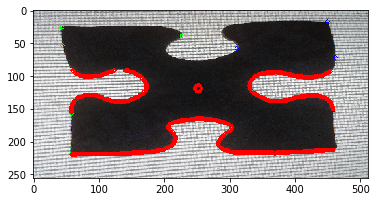

In [30]:
if __name__== "__main__" :
        main()

In [ ]:
img2 = cv2.imread("Puzzle_color.jpg" , cv2.IMREAD_COLOR)
#image = cv2.imread("Puzzle_bw.jpg", cv2.IMREAD_COLOR)
crop_img = img2[500:2800, 1500:3500]
#plt.imshow(crop_img)
img =cv2.resize(crop_img  , (512, 256))
plt.imshow(img)